In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [33]:
!pip install umap-learn

In [34]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [35]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [36]:
penguins = penguins.dropna()

In [37]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [38]:
df_species_count = penguins.species.value_counts().to_frame()
df_species_count = df_species_count.reset_index()
df_species_count

,species,count
0,Adelie,146
1,Gentoo,119
2,Chinstrap,68


In [39]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [40]:
scaled_penguin_data

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, -0.53738048],
       [ 1.24663828,  0.93330475,  0.64546078, -0.13315457],
       [ 1.13675725,  0.7807321 , -0.2120064 , -0.53738048]])

# PCA (Principal Component Analysis)

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2,random_state=42)
X_reduced_PCA_2D = pca.fit_transform(scaled_penguin_data)
X_reduced_PCA_2D.shape



(333, 2)

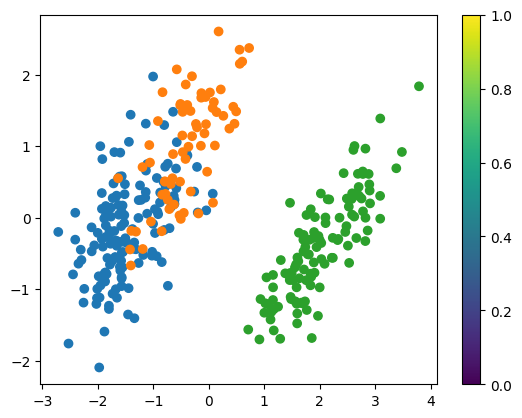

In [43]:
plt.scatter(X_reduced_PCA_2D[:, 0], X_reduced_PCA_2D[:, 1],  c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.colorbar()

In [44]:
pca = PCA(n_components=3,random_state=42)
X_reduced_PCA_3D = pca.fit_transform(scaled_penguin_data)
X_reduced_PCA_3D.shape



(333, 3)

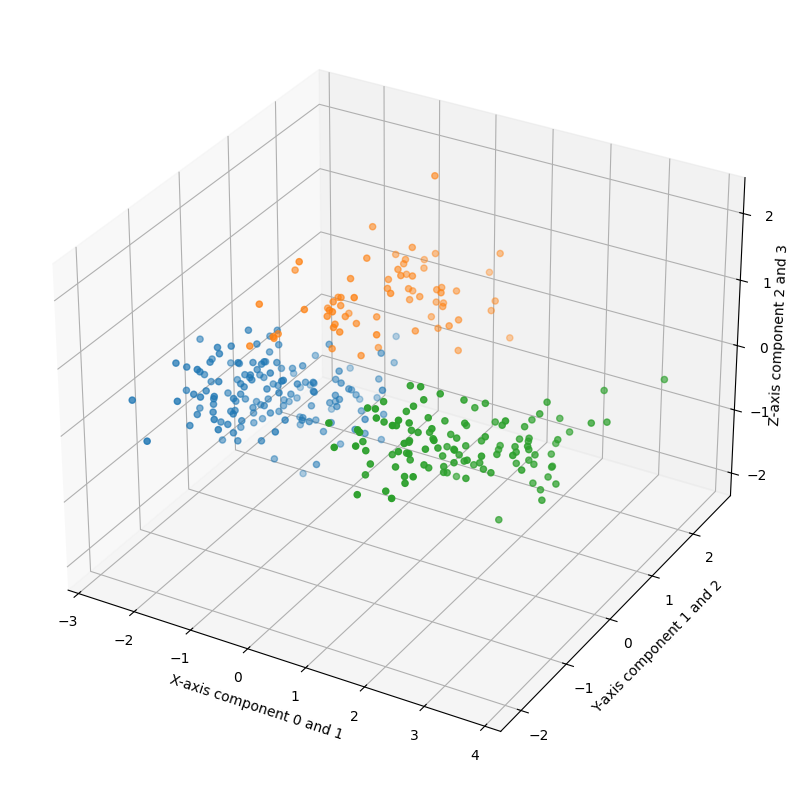

In [45]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Generate the values
x_vals = X_reduced_PCA_3D[:, 0:1]
y_vals = X_reduced_PCA_3D[:, 1:2]
z_vals = X_reduced_PCA_3D[:, 2:3]

ax.scatter3D(x_vals, y_vals, z_vals,c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

#  T-SNE (t-distributed Stochastic Neighbor Embedding)

In [46]:
from sklearn.manifold import TSNE

In [47]:
X_embedded_TSNE_2D = TSNE(n_components=2, learning_rate='auto',

                  init='random', perplexity=3,random_state=42).fit_transform(scaled_penguin_data)

X_embedded_TSNE_2D.shape

(333, 2)

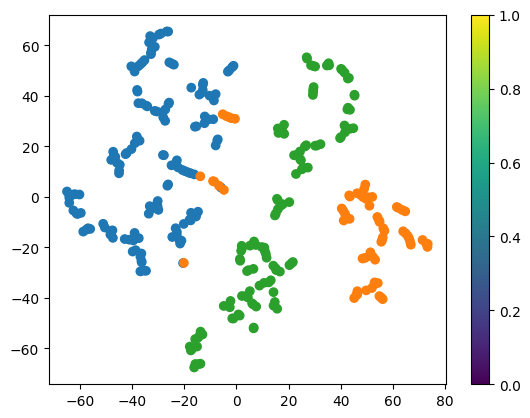

In [48]:
plt.scatter(X_embedded_TSNE_2D[:, 0], X_embedded_TSNE_2D[:, 1],  c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.colorbar()

In [49]:
X_embedded_TSNE_3D = TSNE(n_components=3, learning_rate='auto',

                  init='random', perplexity=3,random_state=42).fit_transform(scaled_penguin_data)

X_embedded_TSNE_3D.shape

(333, 3)

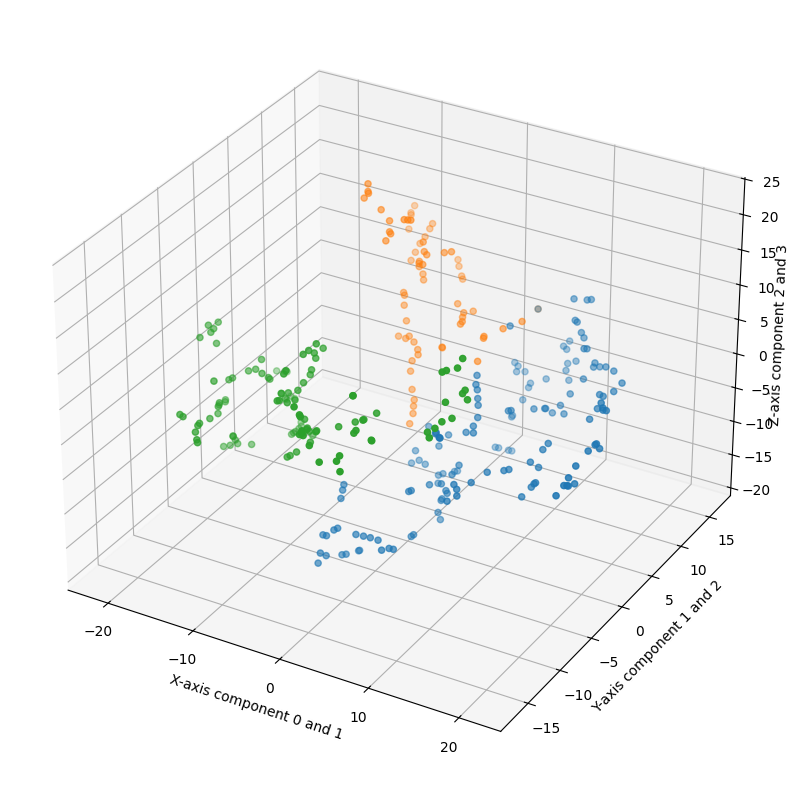

In [50]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Generate the values
x_vals = X_embedded_TSNE_3D[:, 0:1]
y_vals = X_embedded_TSNE_3D[:, 1:2]
z_vals = X_embedded_TSNE_3D[:, 2:3]

ax.scatter3D(x_vals, y_vals, z_vals,c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

# UMAP (Uniform Manifold Approximation and Projection)

In [51]:
import umap.umap_ as umap

In [52]:
reducer = umap.UMAP(random_state=42,n_components=2)
X_embedded_UMAP_2D = reducer.fit_transform(scaled_penguin_data)
X_embedded_UMAP_2D.shape

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(333, 2)

/var/folders/qz/g06xkm313zs7_km2qn5217340000gn/T/ipykernel_9226/4038743397.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


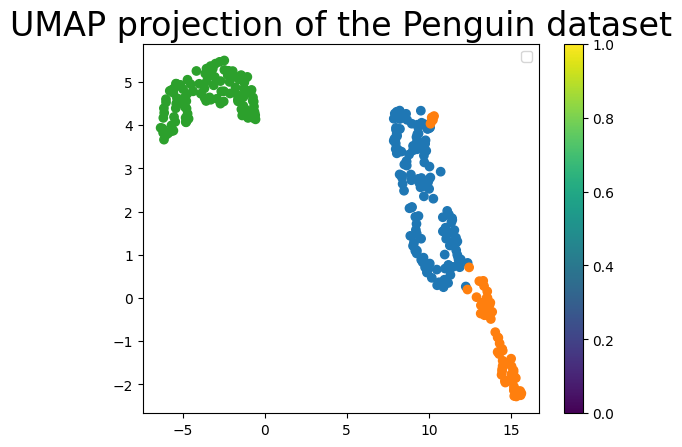

In [53]:
plt.scatter(
    X_embedded_UMAP_2D[:, 0],
    X_embedded_UMAP_2D[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
#plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)
plt.colorbar()
plt.legend()

In [54]:
reducer = umap.UMAP(random_state=42,n_components=3)
X_embedded_UMAP_3D = reducer.fit_transform(scaled_penguin_data)
X_embedded_UMAP_3D.shape

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(333, 3)

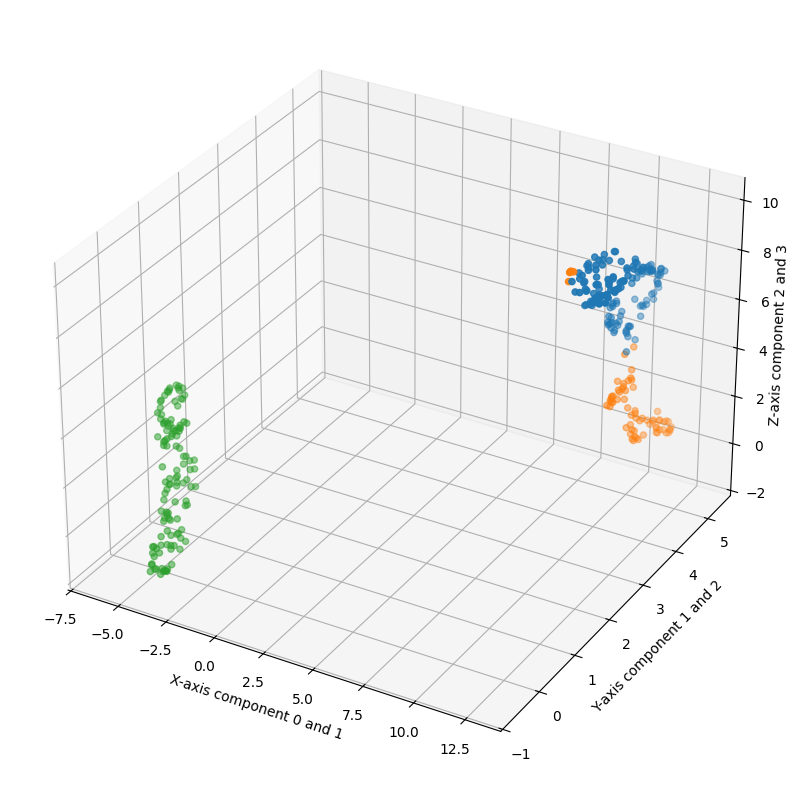

In [55]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Generate the values
x_vals = X_embedded_UMAP_3D[:, 0:1]
y_vals = X_embedded_UMAP_3D[:, 1:2]
z_vals = X_embedded_UMAP_3D[:, 2:3]

ax.scatter3D(x_vals, y_vals, z_vals,c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7
#ax.zaxis.line.set_visible(False)

# 2D PCA, TSNE y UMAP

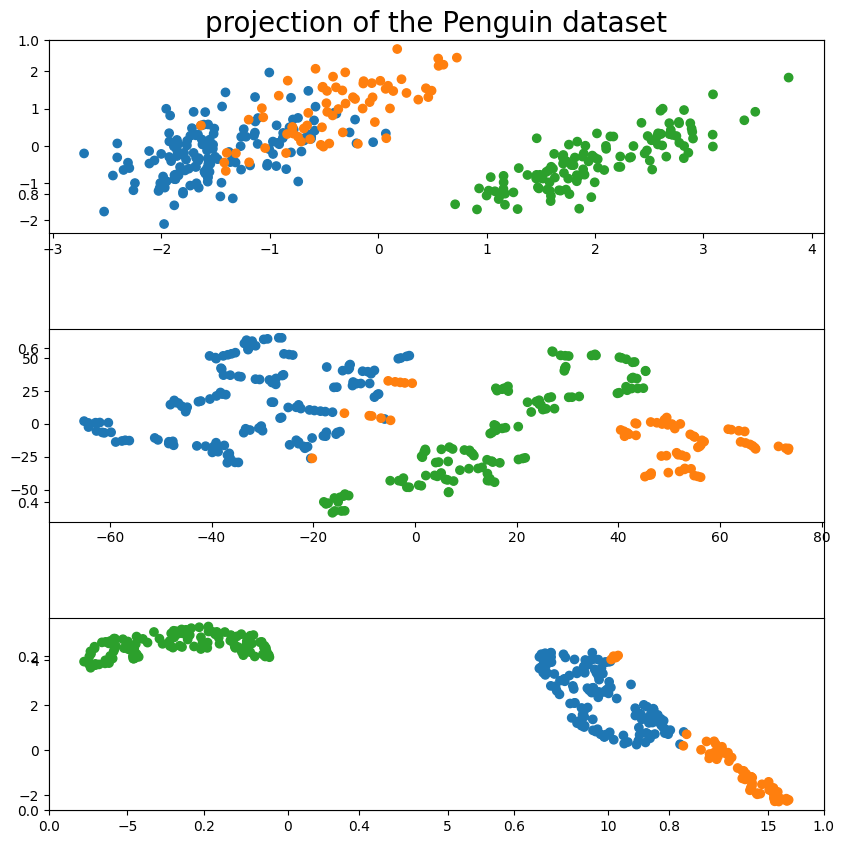

In [56]:
plt.figure(figsize=(10,10))
plt.title('projection of the Penguin dataset', fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.subplot(3,1,1)
plt.scatter(X_reduced_PCA_2D[:, 0], X_reduced_PCA_2D[:, 1],  c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

plt.subplot(3,1,2)

plt.scatter(X_embedded_TSNE_2D[:, 0], X_embedded_TSNE_2D[:, 1],  c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])


plt.subplot(3,1,3)


plt.scatter(
    X_embedded_UMAP_2D[:, 0],
    X_embedded_UMAP_2D[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])










# 3D PCA, TSNE y UMAP

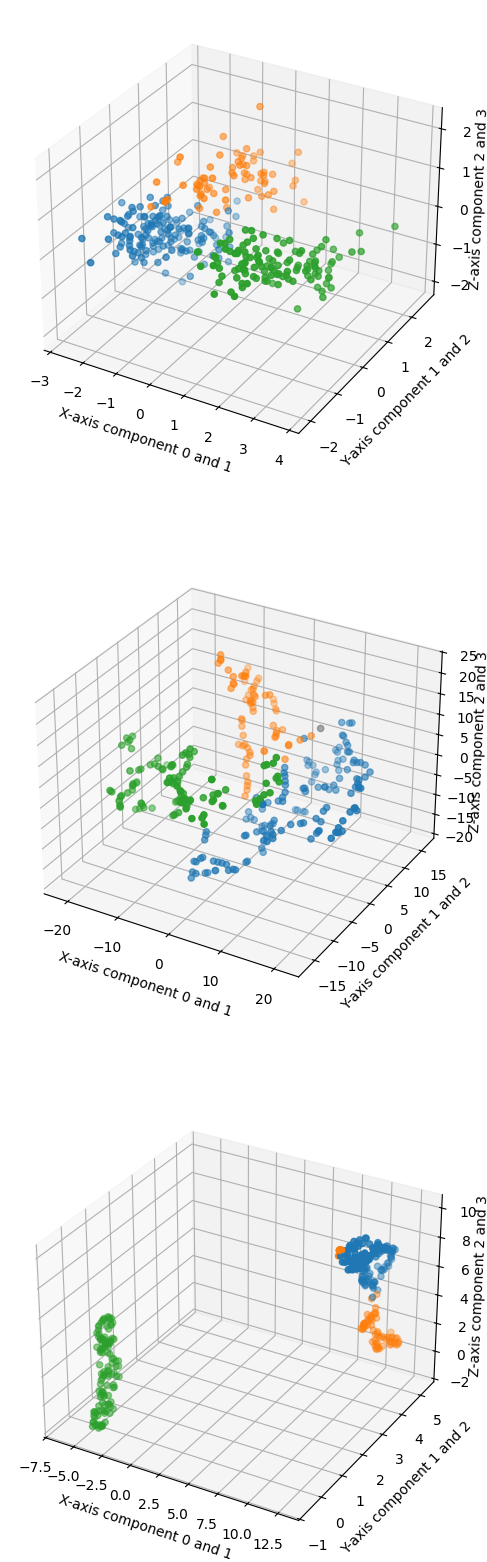

In [57]:

#plt.title('projection of the Penguin dataset 3D', fontsize=20)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(3, 1, 1, projection='3d')
x_vals = X_reduced_PCA_3D[:, 0:1]
y_vals = X_reduced_PCA_3D[:, 1:2]
z_vals = X_reduced_PCA_3D[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 2, projection='3d')

x_vals = X_embedded_TSNE_3D[:, 0:1]
y_vals = X_embedded_TSNE_3D[:, 1:2]
z_vals = X_embedded_TSNE_3D[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 3, projection='3d')
x_vals = X_embedded_UMAP_3D[:, 0:1]
y_vals = X_embedded_UMAP_3D[:, 1:2]
z_vals = X_embedded_UMAP_3D[:, 2:3]


ax.scatter3D(x_vals, y_vals, z_vals,c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7




